# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras

# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [11]:
train, test = keras.datasets.cifar10.load_data()

In [12]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [13]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [18]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """
    Build your own model
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [15]:
## 超參數設定
"""
Set your required experiment parameters
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3]
EPOCHS = 50
BATCH_SIZE = 256

# Adagrad

In [24]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""

for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.Adagrad(lr=lr, epsilon=None, decay=0.0)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}



Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 15s 296us/step - loss: 14.4549 - acc: 0.0982 - val_loss: 14.5058 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 15s 294us/step - loss: 14.4289 - acc: 0.1007 - val_loss: 6.4374 - val_acc: 0.0996
Epoch 3/50
50000/50000 [==============================] - 15s 294us/step - loss: 2.0804 - acc: 0.2510 - val_loss: 1.8516 - val_acc: 0.3271
Epoch 4/50
50000/50000 [==============================] - 15s 294us/step - loss: 1.8066 - acc: 0.3491 - val_loss: 1.8859 - val_acc: 0.3318
Epoch 5/50
50000/50000 [==============================] - 15s 294us/step - loss: 1.7277 - acc: 0.3780 - val_loss: 1.8948 - val_acc: 0.3273
Epoch 6/50
50000/50000 [==============================] - 15s 296us/step - loss: 1.6682 - acc: 0.4027 - val_loss: 1.6802 - val_acc: 0.3986
Epoch 7/50
50000/50000 [==============================] - 15s 302us/step - loss: 1.6229 - acc: 0.4206 - val_loss:

50000/50000 [==============================] - 15s 297us/step - loss: 1.9883 - acc: 0.2828 - val_loss: 1.8958 - val_acc: 0.3297
Epoch 2/50
50000/50000 [==============================] - 15s 293us/step - loss: 1.8048 - acc: 0.3629 - val_loss: 1.8024 - val_acc: 0.3492
Epoch 3/50
50000/50000 [==============================] - 15s 293us/step - loss: 1.7317 - acc: 0.3898 - val_loss: 1.7044 - val_acc: 0.3981
Epoch 4/50
50000/50000 [==============================] - 15s 292us/step - loss: 1.6822 - acc: 0.4090 - val_loss: 1.7301 - val_acc: 0.3763
Epoch 5/50
50000/50000 [==============================] - 15s 295us/step - loss: 1.6459 - acc: 0.4216 - val_loss: 1.6633 - val_acc: 0.4054
Epoch 6/50
50000/50000 [==============================] - 15s 293us/step - loss: 1.6178 - acc: 0.4321 - val_loss: 1.6758 - val_acc: 0.4092
Epoch 7/50
50000/50000 [==============================] - 15s 292us/step - loss: 1.5936 - acc: 0.4409 - val_loss: 1.5919 - val_acc: 0.4390
Epoch 8/50
50000/50000 [==============

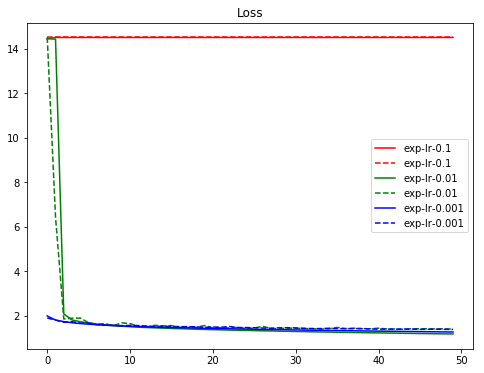

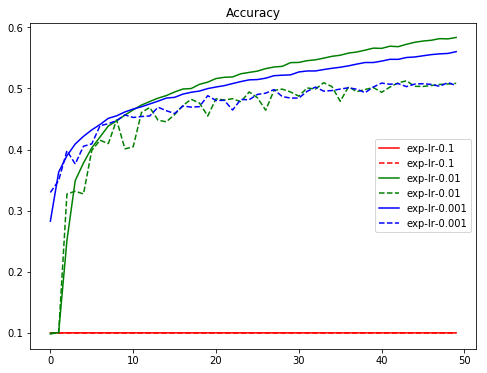

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

# Adam

In [22]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""

for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.adam(lr=lr)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}



Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 16s 317us/step - loss: 14.4307 - acc: 0.0995 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 2/50
50000/50000 [==============================] - 16s 315us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 16s 314us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 16s 317us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 16s 316us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 16s 321us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 16s 317us/step - loss: 14.5063 - acc: 0.1000 -

50000/50000 [==============================] - 16s 315us/step - loss: 1.9297 - acc: 0.3022 - val_loss: 1.7928 - val_acc: 0.3627
Epoch 2/50
50000/50000 [==============================] - 16s 313us/step - loss: 1.7082 - acc: 0.3880 - val_loss: 1.6879 - val_acc: 0.3918
Epoch 3/50
50000/50000 [==============================] - 16s 313us/step - loss: 1.6112 - acc: 0.4233 - val_loss: 1.6097 - val_acc: 0.4125
Epoch 4/50
50000/50000 [==============================] - 16s 313us/step - loss: 1.5536 - acc: 0.4456 - val_loss: 1.5449 - val_acc: 0.4489
Epoch 5/50
50000/50000 [==============================] - 16s 313us/step - loss: 1.5107 - acc: 0.4593 - val_loss: 1.5384 - val_acc: 0.4499
Epoch 6/50
50000/50000 [==============================] - 16s 312us/step - loss: 1.4662 - acc: 0.4764 - val_loss: 1.4707 - val_acc: 0.4731
Epoch 7/50
50000/50000 [==============================] - 16s 315us/step - loss: 1.4313 - acc: 0.4906 - val_loss: 1.5048 - val_acc: 0.4747
Epoch 8/50
50000/50000 [==============

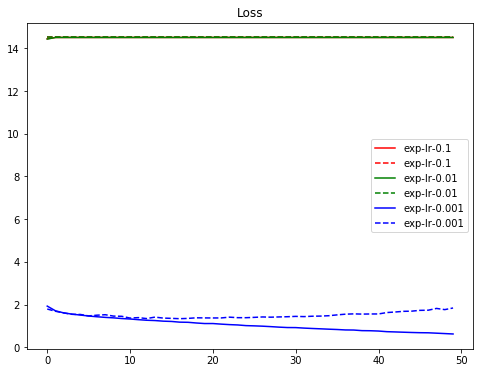

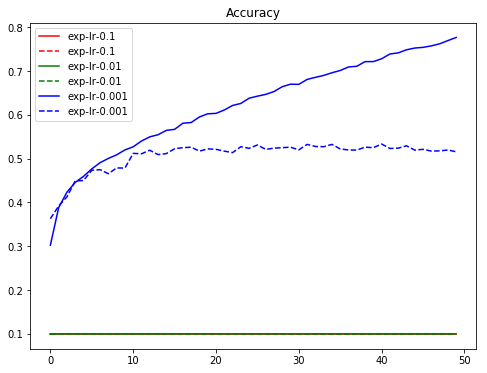

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

### Adagrad和Adam最後test的結果其實差不多(learn rate較小的時候)，太大的learn rate似乎效果不太好，尤其Adam的lr=0.1根本看不到結果